#🧠 Diabetes Prediction using Neural Networks

**👥 Author: Emmanuel J. Generale**

**📆 Date: June 23, 2025**

**💻 Platform: Google Collab**


##🎯 Description
This notebook explores the use of a neural network (`MLPClassifier`) to predict the onset of diabetes based on diagnostic health measurements from the Pima Indians dataset. The goal is to apply concepts from Andrew Ng’s Machine Learning Specialization — particularly from Course 2.

## 📌 Objectives
- Apply techniques from Andrew Ng’s ML Specialization (Courses 1 & 2)
- Perform realistic data cleaning (handling missing values, skewness)
- Normalize and scale input data
- Train, tune, and evaluate a neural network model
- Interpret results using precision, recall, F1 score, and loss curve


In [4]:
import pandas as pd
#Let Load the DataSet, Display and inspect

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**🔎 Looking at the information using .info() and .isnull() there is 0 missing values in every column. But yet this dataset does contain invalid values disguised as real numbers — particularly zeros in columns that should never be zero.**

**We will count number of zeros to the columns where zero physiologically not possible**

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

These features cannot contain zero values.

In [6]:
cols_with_fake_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


df[cols_with_fake_zeros].isin([0]).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


##🔢 Data Cleaning##
**0️⃣ Handle Invalid Zeros**:

- To handle this we will choose a Imputation Strategy

- In this case 5 columns are numeric and continuos, so they're not categorial. We'll check for Skew or Normal Distribution


**Mean:** Good if the data is normally distributed

**Median:** Better for skewed data or when there are outliers



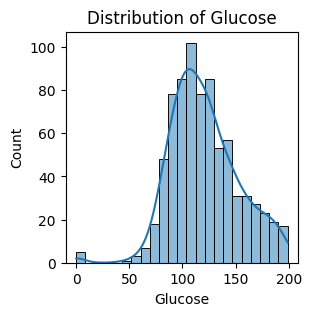

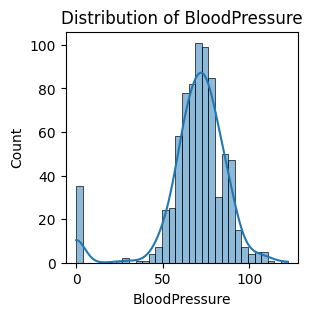

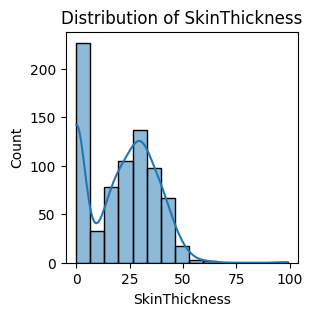

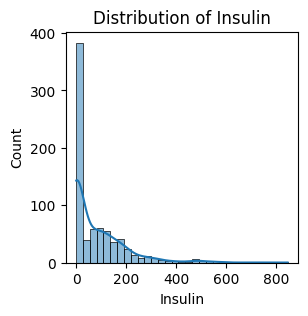

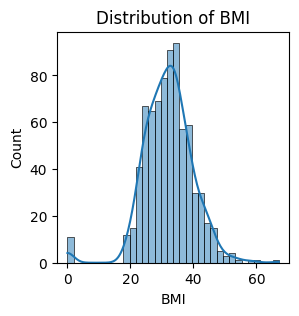

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    plt.figure(figsize=(3,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


**Replace all the zeros in the columns with the real value:**

In [9]:
# Columns that can't have zero
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
     non_zero_values = df[col][df[col] != 0]
     # Choose median or mean
     if col in ['SkinThickness', 'Insulin']:
            replacement = non_zero_values.median()
     else:
            replacement = non_zero_values.mean()

     # Replace and reassign to ensure overwrite
     df[col] = df[col].replace(0, replacement)


cols_with_fake_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_fake_zeros].isin([0]).sum()
#df.head()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


#⚖ Train-Test Split & Feature Scaling (Standardization) #
Before feeding data into a Neural Network, we need to scale the features so they’re on a similar range — especially when features like Insulin and Glucose vary wildly.

**We first do train-Test Split:**

In [10]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target label (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )


**Since We’re Training a Neural Network...**

👉 Neural networks usually converge faster and more accurately when features are:

Centered around 0 and have similar scale

✅ So we used StandardScaler



In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



##🧠 Train a Neural Network with MLPClassifier

This is my first neural net project outside the course, and it’s great doing it from raw data.



In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(16, 8),  # 2 hidden layers: 16 → 8 neurons
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
                    )


**Let's fit the Data**

In [13]:
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)

**Evaluation Metrics for Classification:**

Let's run this evaluation below;

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict
y_pred = mlp.predict(X_test_scaled)

# Evaluate
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.7532467532467533
Precision: 0.660377358490566
Recall   : 0.6363636363636364
F1 Score : 0.6481481481481481
Confusion Matrix:
 [[81 18]
 [20 35]]


## Visualize the Neural Network’s Performance

Since we trained a neural net, we can check if it:

🧠 Converged properly

📉 Got stuck early

🔁 Is overfitting or underfitting



**➰ Loss Curve (Learning Curve for Neural Networks)**

🔻 Loss should decrease as training progresses

📉 A smooth downward curve = good learning

🛑 A flat or wiggly curve = may have converged too early or stuck

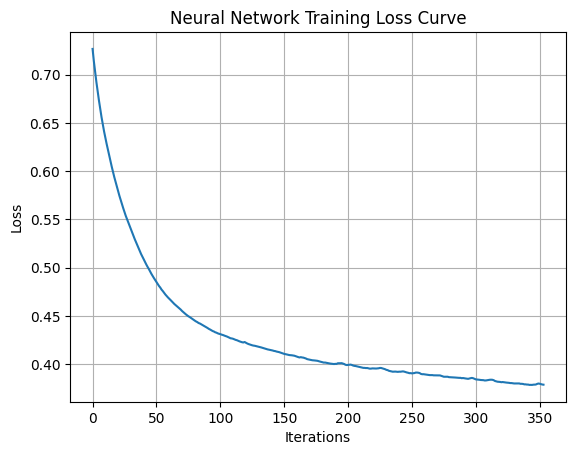

In [15]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.title("Neural Network Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


**✅ Our neural network has likely learned useful patterns from the data**



##➕ Neural Network Tuning

**I will now proceed to Fine tuning since I want to apply and deepen what I learned in Andrew Ng's Course 2**


- I already using MLPClassifier, a great starting point.

- No I can explore how different settings affect learning.



**We'll gonna tune:**

- hidden_layer_sizes Change network depth / neurons per layer

- activationTry 'relu', 'tanh', etc.

- solver	Optimization method

- alphaRegularization (to prevent overfitting)

- learning_rate_init	Initial learning rate

- max_iter	Number of iterations

- early_stopping=TrueStop when model stops improving



**Let's train tuned Neural Network:**

In [16]:
from sklearn.neural_network import MLPClassifier

# Tuned model with deeper architecture and regularization
mlp_tuned = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),   # deeper + more expressive
    activation='relu',                # faster & more stable
    solver='adam',                    # adaptive optimizer
    alpha=0.001,                      # L2 regularization
    learning_rate_init=0.001,        # lower learning rate
    max_iter=1000,                    # enough room to learn
    early_stopping=True,             # avoids overfitting
    random_state=42
)

# Train the model
mlp_tuned.fit(X_train_scaled, y_train)


MLPClassifier(alpha=0.001, early_stopping=True, hidden_layer_sizes=(32, 16, 8),
              max_iter=1000, random_state=42)

**Evaluate the Tuned Model:**

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict
y_pred_tuned = mlp_tuned.predict(X_test_scaled)

# Evaluation
print("Tuned Accuracy :", accuracy_score(y_test, y_pred_tuned))
print("Tuned Precision:", precision_score(y_test, y_pred_tuned))
print("Tuned Recall   :", recall_score(y_test, y_pred_tuned))
print("Tuned F1 Score :", f1_score(y_test, y_pred_tuned))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Tuned Accuracy : 0.7727272727272727
Tuned Precision: 0.6923076923076923
Tuned Recall   : 0.6545454545454545
Tuned F1 Score : 0.6728971962616822
Tuned Confusion Matrix:
 [[83 16]
 [19 36]]


## Compare Results — Before vs After Tuning

### 📊 Comparison: Before vs After Tuning

| Metric       | Before Tuning | After Tuning | Difference  |
|--------------|---------------|--------------|-------------|
| Accuracy     | 0.753         | 0.773        | ✅ +2.0%     |
| Precision    | 0.660         | 0.692        | ✅ Improved  |
| Recall       | 0.636         | 0.655        | ✅ Improved  |
| F1 Score     | 0.648         | 0.673        | ✅ Improved  |
| Conf. Matrix | [[81,18],[20,35]] | [[83,16],[19,36]] | ✅ Fewer false outcomes |


**What This Means?**

**Tuning helped the model learn better** — it's more precise and better at identifying diabetics.

✅ **Fewer false positives and false negatives**

⚖️ **Balanced performance:** great F1 score shows both precision and recall improved together.



🔚 **To summarize what I applied from ML Lessons in Course 2:**

- handled dirty data, not pre-cleaned — ✅

- understood activation functions, scaling, and training loss — ✅

- I used and tuned a neural network architecture — ✅

- And evaluated the model beyond accuracy — ✅

- Doing model comparison & interpretation — ✅



##Save the Final Model:##

In [18]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(mlp_tuned, 'diabetes_model.pkl')


['diabetes_model.pkl']

In [19]:
import shutil

# Rename the current notebook (default is always '/content/Untitled0.ipynb' or similar)
shutil.copy('diabetes_prediction_n.ipynb', '/content/1diabetes_prediction_nn.ipynb')

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_prediction_n.ipynb'